In [7]:
%load_ext autoreload
%autoreload 2
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
# ensure is in parent directory
try:
    print(os.getcwd())
    os.chdir("../../rug-hr/")
    print(os.getcwd())
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\mo\Documents\Organisations\RUG\rug-hr


(1788, 1337)


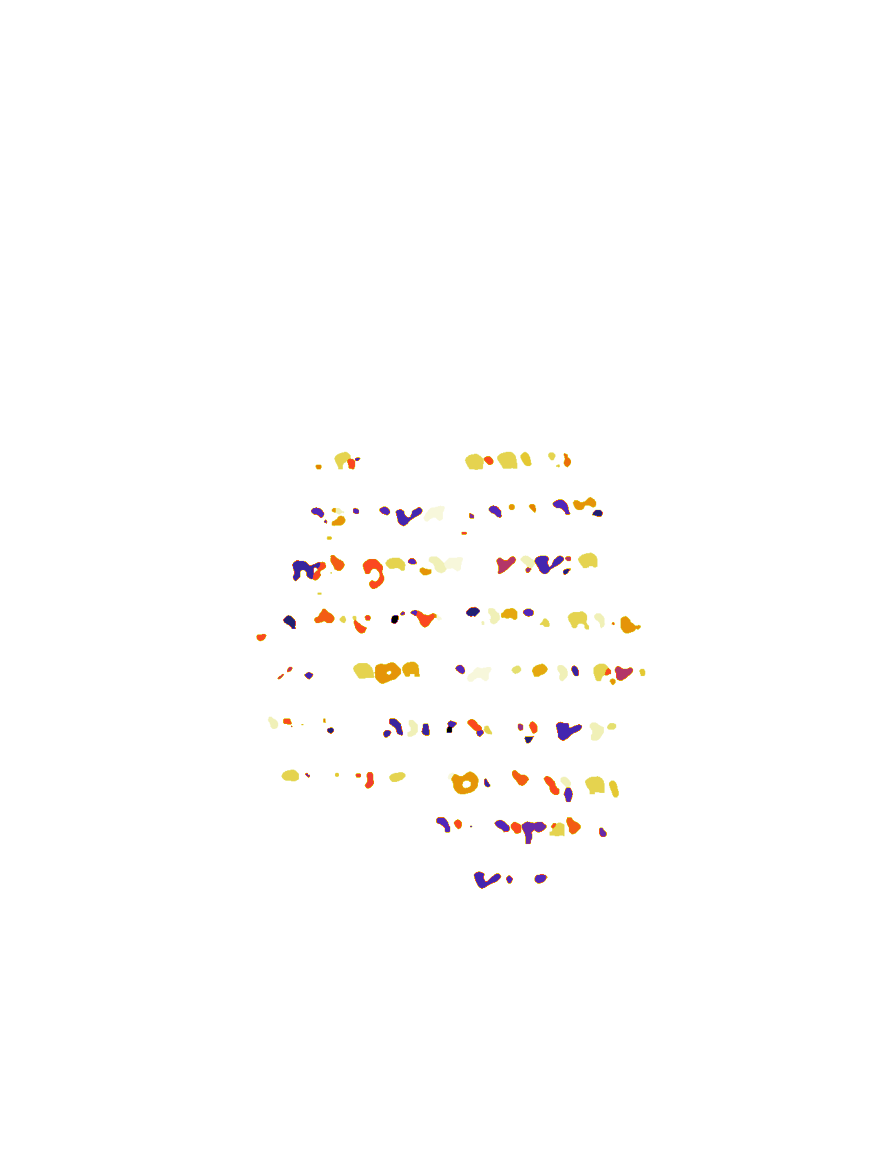

(1788, 1337) 24 labels are present
המהמהוהמכ
רטבררשארטירטם
ט
תמלמהרמטבאעבשםנה
פ
מםלההמץרמיאםבחרההבט
שהטחראדחבתהמטעו
במםתתבתץשמרהפםמשבד
פ
הנהאטתלמברהו
רמרמקמהלק
שררמ


In [11]:
from modules.dss import SegLMDSS
from modules.dss.postprocessing import transcribe_image
from modules.scripturize.utils.plot import show_labelled_manuscript
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

model = SegLMDSS().to(device)
# model.load("./artifacts/hebrew_unetr.pt")
model.load("./artifacts/seglm-v1-256x256-dss.pt")
# sample_path = "./datasets/image-data/P106-Fg002-R-C01-R01-binarized.jpg"
sample_path = "./datasets/image-data/P168-Fg016-R-C01-R01-binarized.jpg"
# sample_path = "./datasets/dss_corrupted/Mutated/manu_1.png"
predictions = model.predict(im_path=sample_path)
print(predictions.shape)

np.save("output.npy", predictions)

show_labelled_manuscript(predictions, interactive=False, random_crop_size=False)
plt.show()

transcription = transcribe_image(predictions)
print(transcription)
Image.fromarray(predictions.astype(np.int16)).save(f"./datasets/outputs/{np.random.randint(0, 1000)}.png")